In [171]:
import numpy as np
from scipy.optimize import minimize
from scipy.io import loadmat
from numpy.linalg import det, inv
import math
import scipy.io
import matplotlib.pyplot as plt
import pickle
import sys


In [356]:
def ldaLearn(X,y):
    # Inputs
    # X - a N x d matrix with each row corresponding to a training example
    # y - a N x 1 column vector indicating the labels for each training example
    #
    # Outputs
    # means - A d x k matrix containing learnt means for each of the k classes
    # covmat - A single d x d learnt covariance matrix 
    
    # IMPLEMENT THIS METHOD 
    Uni = (np.unique(y))    
    Label_Mean = []
    
    #References:
    # Covariance https://en.wikipedia.org/wiki/Covariance_matrix
    #https://www.youtube.com/watch?v=9IDXYHhAfGA
    
    #
    
    covmat = np.cov(X.T) ## .T is used to create the transpose
    for i in Uni:
        x = []
        for j in range(len(y)):
            if(i == y[j]):
                x.append(X[j])
        Label_Mean.append(np.mean(x,axis= 0))
    means = np.array(Label_Mean).T
    #print(means)
    return means,covmat

In [357]:

def qdaLearn(X,y):
    # Inputs
    # X - a N x d matrix with each row corresponding to a training example
    # y - a N x 1 column vector indicating the labels for each training example
    #
    # Outputs
    # means - A d x k matrix containing learnt means for each of the k classes
    # covmats - A list of k d x d learnt covariance matrices for each of the k classes
    
    # IMPLEMENT THIS METHOD
    # Referred https://www.youtube.com/watch?v=r3eeN_fgjAs&t=209s
    Uni = (np.unique(ytest))
    Label_Mean = []
    covmats = []

    #Find mean of all Xs for unique y values and covariance wrt those Xs

    for i in Uni:
        x = []
        for j in range(len(y)):
            if(i == y[j]):
                x.append(X[j])
        Label_Mean.append(np.mean(x,axis= 0))
        covmats.append(np.cov(np.array(x).T))
    means = np.array(Label_Mean).T
    return means,covmats
    



In [377]:
def ldaTest(means,covmat,Xtest,ytest):
    # Inputs
    # means, covmat - parameters of the LDA model
    # Xtest - a N x d matrix with each row corresponding to a test example
    # ytest - a N x 1 column vector indicating the labels for each test example
    # Outputs
    # acc - A scalar accuracy value
    # ypred - N x 1 column vector indicating the predicted labels

    # IMPLEMENT THIS METHOD
    y_estimate = [] 
    Uni = np.unique(y)
    for x in Xtest:
        Max_prob = []
        for i in  range(len(Uni)):
            u = means[:,i].reshape(1,2)
            z =  ( 1/(((2*np.pi)**(x.shape[0]/2))*(det(covmat)**0.5)))*np.exp(-1 / 2 * np.dot((x-u), np.dot(inv(covmat), (x-u).T))) #determinant
            Max_prob.append([z])
            
        for i in range(len(Max_prob)):
            if Max_prob[i] == max(Max_prob):
                y_estimate.append(Uni[i])
    
    # Calculate accuracy in terms of matches.
    count = 0
    for i in range(len(y_estimate)):
        if(y_estimate[i]== ytest[i]):
            count +=1

    acc = count/len(y_estimate)
    
    ypred = np.array(y_estimate)
    return acc,ypred


In [434]:

def qdaTest(means,covmats,Xtest,ytest):
    # Inputs
    # means, covmats - parameters of the QDA model
    # Xtest - a N x d matrix with each row corresponding to a test example
    # ytest - a N x 1 column vector indicating the labels for each test example
    # Outputs
    # acc - A scalar accuracy value
    # ypred - N x 1 column vector indicating the predicted labels

    # IMPLEMENT THIS METHOD
    #print(Xtest.shape,means.shape)
    y_estimate = []
    Uni = np.unique(y)
    


    for x in Xtest:
        label_prob = []
        #print(x)
        for i in range(len(Uni)):
            u = means[:,i]
            #print(u.shape)
            v = np.exp(-1 / 2 * np.dot((x-u), np.dot(inv(covmats[i]), (x-u).T)))
            z = ( 1/(((2*np.pi)**(x.shape[0]/2))*(det(covmats[i])**0.5)))*v
            label_prob.append([z])
            
        for i in range(len(label_prob)):
            if label_prob[i] == max(label_prob):
                y_estimate.append(Uni[i])
    #print(means,means[:,1],label_list)
    #Accuracy
    count = 0
    for i in range(len(y_estimate)):
        if(y_estimate[i]== ytest[i]):
            count +=1
    
    acc = count / len(y_estimate)
    ypred = np.array(y_estimate)
    return acc,ypred

In [435]:
def learnOLERegression(X,y):
    # Inputs:                                                         
    # X = N x d 
    # y = N x 1                                                               
    # Output: 
    # w = d x 1 
    # IMPLEMENT THIS METHOD 
    
    w = np.dot(inv(np.dot((X.T),X)),np.dot((X.T),y))
    
    return w

In [436]:
def learnRidgeRegression(X,y,lambd):
    # Inputs:
    # X = N x d                                                               
    # y = N x 1 
    # lambd = ridge parameter (scalar)
    # Output:                                                                  
    # w = d x 1                                                                

    # IMPLEMENT THIS METHOD
    # Referred Lecture notes 5 page 19
    a = np.dot(X.T, X)
    d = a.shape[0]
    b = lambd*np.identity(d)
    c = inv(a+b)
    w = np.dot(c, np.dot(X.T,y))
    return w

In [437]:
def testOLERegression(w,Xtest,ytest):
    # Inputs:
    # w = d x 1
    # Xtest = N x d
    # ytest = X x 1
    # Output:
    # mse
    # Reference
    # https://medium.com/data-science-bootcamp/understand-dot-products-matrix-multiplications-usage-in-deep-learning-in-minutes-beginner-95edf2e66155
    yest = np.dot(Xtest,w)
    error = ytest - yest
    mse = np.dot(error.T,error)/(len(error))

    return mse

In [480]:
def regressionObjVal(w, X, y, lambd):

    # compute squared error (scalar) and gradient of squared error with respect
    # to w (vector) for the given data X and y and the regularization parameter
    # lambda                                                                  

    # IMPLEMENT THIS METHOD
    # # Referred Lecture notes 5 page 19
    
    w = w.reshape(X.shape[1],1)
    error = ((np.dot((y - np.dot(X,w)).T,(y - np.dot(X,w))) + lambd*np.dot(w.transpose(),w)))/2
    
    # diff the same 
    # -(X.Ty)+(X.TXw)+lambda*w
    z = np.dot(X,w)
    a = np.dot(X.T,z)
    b = -(np.dot(X.T,y))
    error_grad = b + a + lambd*w
    #print(error_grad.shape)
    error_grad = np.squeeze(np.array(error_grad))
    #print(error_grad.shape)
    #print(error_grad.shape)
    return error, error_grad
  

In [439]:

def mapNonLinear(x,p):
    # Inputs:                                                                  
    # x - a single column vector (N x 1)                                       
    # p - integer (>= 0)                                                       
    # Outputs:                                                                 
    # Xp - (N x (p+1)) 
    N = x.shape[0]
    Xp = np.zeros((N,(p+1)))
    #print(Xp.shape)
    #Xp = np.ones((N,(p+1))) 
    for i  in range(p+1):
        Xp[:,i] = (x**i) #x**0 = 1, x**1 = x, X**2 till p
    return Xp



LDA Accuracy = 0.97
QDA Accuracy = 0.96


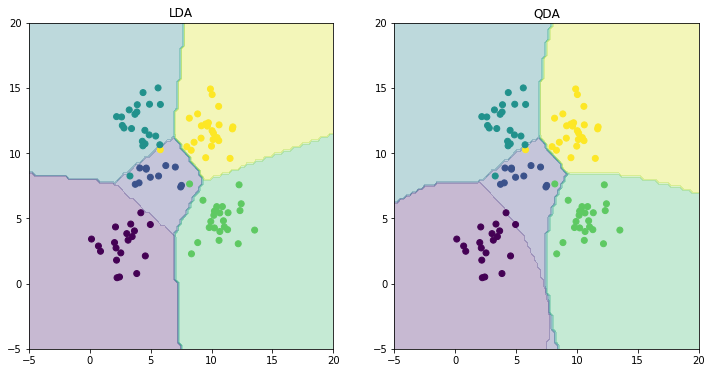

In [440]:
# Main script

# Problem 1
# load the sample data                                                                 
if sys.version_info.major == 2:
    X,y,Xtest,ytest,Xtrain,ytrain = pickle.load(open('sample.pickle','rb'))
else:
    X,y,Xtest,ytest = pickle.load(open('sample.pickle','rb'),encoding = 'latin1')
#print(y)
# LDA
means,covmat = ldaLearn(X,y)
#print(means,covmat)
ldaacc,ldares = ldaTest(means,covmat,Xtest,ytest)


print('LDA Accuracy = '+str(ldaacc))
# QDA
means,covmats = qdaLearn(X,y)
qdaacc,qdares = qdaTest(means,covmats,Xtest,ytest)
print('QDA Accuracy = '+str(qdaacc))

# plotting boundaries
x1 = np.linspace(-5,20,100)
x2 = np.linspace(-5,20,100)
xx1,xx2 = np.meshgrid(x1,x2)
xx = np.zeros((x1.shape[0]*x2.shape[0],2))
xx[:,0] = xx1.ravel()
xx[:,1] = xx2.ravel()

fig = plt.figure(figsize=[12,6])
plt.subplot(1, 2, 1)

zacc,zldares = ldaTest(means,covmat,xx,np.zeros((xx.shape[0],1)))
plt.contourf(x1,x2,zldares.reshape((x1.shape[0],x2.shape[0])),alpha=0.3)
plt.scatter(Xtest[:,0],Xtest[:,1],c=ytest.ravel())
plt.title('LDA')

plt.subplot(1, 2, 2)

zacc,zqdares = qdaTest(means,covmats,xx,np.zeros((xx.shape[0],1)))
plt.contourf(x1,x2,zqdares.reshape((x1.shape[0],x2.shape[0])),alpha=0.3)
plt.scatter(Xtest[:,0],Xtest[:,1],c=ytest.ravel())
plt.title('QDA')
plt.show()




In [473]:
# Problem 2
if sys.version_info.major == 2:
    X,y,Xtest,ytest = pickle.load(open('diabetes.pickle','rb'))
else:
    X,y,Xtest,ytest = pickle.load(open('diabetes.pickle','rb'),encoding = 'latin1')
   


# add intercept
bar_test = []
X_i = np.concatenate((np.ones((X.shape[0],1)), X), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)
#Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)

w = learnOLERegression(X,y)
mle = testOLERegression(w,Xtest,ytest)

w_i = learnOLERegression(X_i,y)
mle_i = testOLERegression(w_i,Xtest_i,ytest)
bar_test.append(float(mle))
bar_test.append(float(mle_i))

print('MSE without intercept '+str(mle))
print('MSE with intercept '+str(mle_i))

MSE without intercept [[106775.36155223]]
MSE with intercept [[3707.84018148]]


In [442]:
if sys.version_info.major == 2:
    X,y,Xtrain,Xtest = pickle.load(open('diabetes.pickle','rb'))
else:
    X,y,Xtrain,Xtest = pickle.load(open('diabetes.pickle','rb'),encoding = 'latin1')
X_i = np.concatenate((np.ones((X.shape[0],1)), X), axis=1)


bar_train = []  
c = learnOLERegression(X,y)
cmle = testOLERegression(c,X,y)

c_i = learnOLERegression(X_i,y)
cmle_i = testOLERegression(c_i,X_i,y)
bar_train.append(float(cmle))
bar_train.append(float(cmle_i))

print('MSE without intercept '+str(cmle))
print('MSE with intercept '+str(cmle_i))

MSE without intercept [[19099.44684457]]
MSE with intercept [[2187.16029493]]


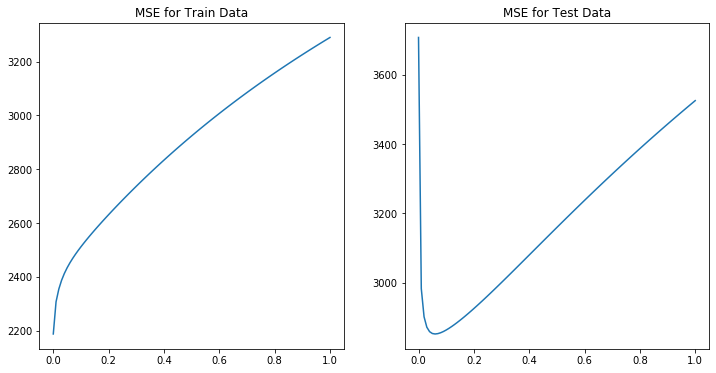

In [474]:
# Problem 3
k = 101
lambdas = np.linspace(0, 1, num=k)
i = 0
mses3_train = np.zeros((k,1))
mses3 = np.zeros((k,1))
for lambd in lambdas:
    w_l = learnRidgeRegression(X_i,y,lambd)
    mses3_train[i] = testOLERegression(w_l,X_i,y)
    mses3[i] = testOLERegression(w_l,Xtest_i,ytest)
    i = i + 1
fig = plt.figure(figsize=[12,6])
plt.subplot(1, 2, 1)
plt.plot(lambdas,mses3_train)
plt.title('MSE for Train Data')
plt.subplot(1, 2, 2)
plt.plot(lambdas,mses3)
plt.title('MSE for Test Data')
plt.show()

In [444]:
if sys.version_info.major == 2:
    X,y,Xtest,ytest = pickle.load(open('diabetes.pickle','rb'))
else:
    X,y,Xtest,ytest = pickle.load(open('diabetes.pickle','rb'),encoding = 'latin1')
   



# add intercept
import pandas as pd
lambdas = np.linspace(0, 1, num=k)
Test = []
Train = []

for i in lambdas:
    X_i = np.concatenate((np.ones((X.shape[0],1)), X), axis=1)
    Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)
    #Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)



    w_i = learnRidgeRegression(X_i,y,i)
    mle_i = testOLERegression(w_i,Xtest_i,ytest)
    Test.append(float(mle_i))
    cw_i = learnRidgeRegression(X_i,y,i)
    cmle_i = testOLERegression(cw_i,X_i,y)
    Train.append(float(cmle_i))

d = pd.DataFrame(list(zip(Test,Train)),index = lambdas,columns=['Test','Train'])
print(min(Test),min(Train))

for i in range(len(Test)):
    if Test[i] == min(Test):
        print(lambdas[i])
for i in range(len(Test)):
    if Train[i] == min(Train):
        print(lambdas[i])
bar_test.append(min(Test))
bar_train.append(min(Train))
d


2851.3302134438477 2187.1602949303897
0.06
0.0


,Test,Train
0.00,3707.840181,2187.160295
0.01,2982.446120,2306.832218
0.02,2900.973587,2354.071344
0.03,2870.941589,2386.780163
0.04,2858.000410,2412.119043
...,...,...
0.96,3498.570906,3264.613861
0.97,3505.318324,3270.957170
0.98,3512.038029,3277.262582
0.99,3518.730082,3283.530490


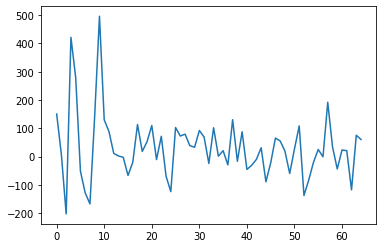

In [370]:
import matplotlib.pyplot as plt
w_i = learnRidgeRegression(X_i,y,0.06)
w_i = list(w_i)
x = []
for i in range(len(w_i)):
    x.append(float(w_i[i]))

plt.plot(x)

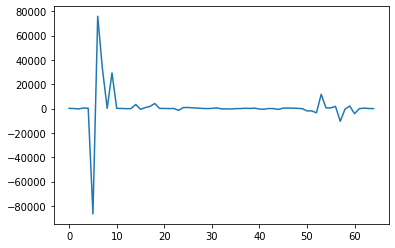

In [371]:
w_i = learnOLERegression(X_i,y)
w_i = list(w_i)
y = []
for i in range(len(w_i)):
    y.append(float(w_i[i]))

plt.plot(y)

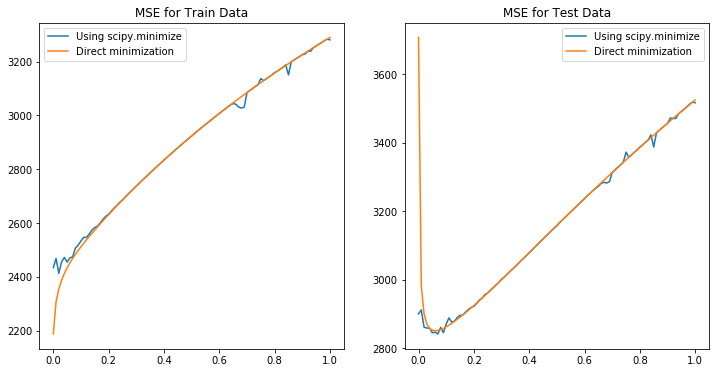

In [481]:
# Problem 4
k = 101
lambdas = np.linspace(0, 1, num=k)
i = 0
mses4_train = np.zeros((k,1))
mses4 = np.zeros((k,1))
opts = {'maxiter' : 20}    # Preferred value.                                                
w_init = np.ones((X_i.shape[1],1))
for lambd in lambdas:
    args = (X_i, y, lambd)
    w_l = minimize(regressionObjVal, w_init, jac=True, args=args,method='CG', options=opts)
    w_l = np.transpose(np.array(w_l.x))
    w_l = np.reshape(w_l,[len(w_l),1])
    mses4_train[i] = testOLERegression(w_l,X_i,y)
    mses4[i] = testOLERegression(w_l,Xtest_i,ytest)
    i = i + 1

fig = plt.figure(figsize=[12,6])
plt.subplot(1, 2, 1)
plt.plot(lambdas,mses4_train)
plt.plot(lambdas,mses3_train)
plt.title('MSE for Train Data')
plt.legend(['Using scipy.minimize','Direct minimization'])

plt.subplot(1, 2, 2)
plt.plot(lambdas,mses4)
plt.plot(lambdas,mses3)
plt.title('MSE for Test Data')
plt.legend(['Using scipy.minimize','Direct minimization'])
plt.show()

In [471]:
display(pd.DataFrame(zip(mses4_train,mses4),columns = ['Train','Test'], index = lambdas))
#mses4_train = list(mses4_train)
for i in range(len(mses4_train)):
    if mses4_train[i] == min(mses4_train):
        print(mses4_train[i],lambdas[i],"Train")
for i in range(len(mses4)):
    if mses4[i] == min(mses4):
        print(mses4[i],lambdas[i],"Test")
print(min(mses4))
bar_test.append(float(min(mses4)))
bar_train.append(float(min(mses4_train)))
               
               

,Train,Test
0.00,[2433.663715748937],[2900.5465270951986]
0.01,[2468.0694188476455],[2912.085061530347]
0.02,[2412.7288041591605],[2861.573039827326]
0.03,[2455.453764295272],[2859.1090394481666]
0.04,[2471.8986299413605],[2858.7410590738023]
...,...,...
0.96,[3264.6151092608543],[3498.088106993073]
0.97,[3270.9571902549274],[3505.3083246133733]
0.98,[3278.3997222001444],[3513.5109124395412]
0.99,[3283.6998786551235],[3518.7835132583896]


[2412.72880416] 0.02 Train
[2841.78722097] 0.07 Test
[2841.78722097]


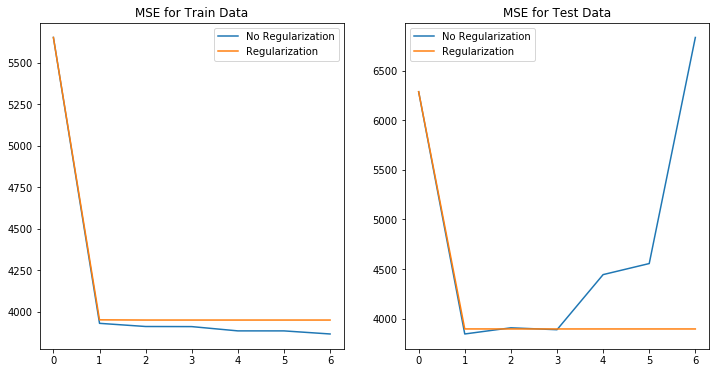

In [391]:

# Problem 5
pmax = 7
lambda_opt = 0.06 # REPLACE THIS WITH lambda_opt estimated from Problem 3
mses5_train = np.zeros((pmax,2))
mses5 = np.zeros((pmax,2))
for p in range(pmax):
    Xd = mapNonLinear(X[:,2],p)
    Xdtest = mapNonLinear(Xtest[:,2],p)
    w_d1 = learnRidgeRegression(Xd,y,0)
    mses5_train[p,0] = testOLERegression(w_d1,Xd,y)
    mses5[p,0] = testOLERegression(w_d1,Xdtest,ytest)
    w_d2 = learnRidgeRegression(Xd,y,lambda_opt)
    mses5_train[p,1] = testOLERegression(w_d2,Xd,y)
    mses5[p,1] = testOLERegression(w_d2,Xdtest,ytest)

fig = plt.figure(figsize=[12,6])
plt.subplot(1, 2, 1)
plt.plot(range(pmax),mses5_train)
plt.title('MSE for Train Data')
plt.legend(('No Regularization','Regularization'))
plt.subplot(1, 2, 2)
plt.plot(range(pmax),mses5)
plt.title('MSE for Test Data')
plt.legend(('No Regularization','Regularization'))
plt.show()



In [329]:

pmax = 7
lambda_opt = 0.0 # REPLACE THIS WITH lambda_opt estimated from Problem 3
mses5_train = np.zeros((pmax,2))
mses5 = np.zeros((pmax,2))
for p in range(pmax):
    Xd = mapNonLinear(X[:,2],p)
    Xdtest = mapNonLinear(Xtest[:,2],p)
    w_d1 = learnRidgeRegression(Xd,y,0)
    mses5_train[p,0] = testOLERegression(w_d1,Xd,y)
    mses5[p,0] = testOLERegression(w_d1,Xdtest,ytest)
    w_d2 = learnRidgeRegression(Xd,y,lambda_opt)
    mses5_train[p,1] = testOLERegression(w_d2,Xd,y)
    mses5[p,1] = testOLERegression(w_d2,Xdtest,ytest)
x = (mses5_train[:,1])
y = (mses5[:,1]) 
print(pd.DataFrame(zip(x,y), columns= ["Train","Test"]))


for i in range(len(x)):
    if x[i] == min(x):
        print(x[i],i,"Train")
for i in range(len(y)):
    if y[i] == min(y):
        print(y[i],i,"Test")
bar_test.append(float(min(y)))
bar_train.append(float(min(x)))




         Train         Test
0  5650.710539  6286.404792
1  3930.915407  3845.034730
2  3911.839671  3907.128099
3  3911.188665  3887.975538
4  3885.473068  4443.327892
5  3885.407157  4554.830377
6  3866.883449  6833.459149
3866.8834494460493 6 Train
3845.034730173414 1 Test


In [353]:
pmax = 7
lambda_opt = 0.06 # REPLACE THIS WITH lambda_opt estimated from Problem 3
mses5_train = np.zeros((pmax,2))
mses5 = np.zeros((pmax,2))
for p in range(pmax):
    Xd = mapNonLinear(X[:,2],p)
    Xdtest = mapNonLinear(Xtest[:,2],p)
    w_d1 = learnRidgeRegression(Xd,y,0)
    mses5_train[p,0] = testOLERegression(w_d1,Xd,y)
    mses5[p,0] = testOLERegression(w_d1,Xdtest,ytest)
    w_d2 = learnRidgeRegression(Xd,y,lambda_opt)
    mses5_train[p,1] = testOLERegression(w_d2,Xd,y)
    mses5[p,1] = testOLERegression(w_d2,Xdtest,ytest)
x = (mses5_train[:,1])
y = (mses5[:,1]) 
print(pd.DataFrame(zip(x,y), columns= ["Train","Test"]))


for i in range(len(x)):
    if x[i] == min(x):
        print(x[i],i,"Train")
for i in range(len(y)):
    if y[i] == min(y):
        print(y[i],i,"Test")


         Train         Test
0  5650.711907  6286.881967
1  3951.839124  3895.856464
2  3950.687312  3895.584056
3  3950.682532  3895.582716
4  3950.682337  3895.582668
5  3950.682335  3895.582669
6  3950.682335  3895.582669
3950.682335142783 6 Train
3895.582668283526 4 Test


In [392]:
bar_train.append(3866.8834494460493)
bar_train.append(3950.682335142783)
bar_test.append(3845.034730173414)
bar_test.append(3895.582668283526)


In [393]:
print(bar_test)
print(bar_train)

[106775.36155223261, 3707.840181476299, 2851.3302134438477, 2841.7872209688135, 3845.034730173414, 3895.582668283526]
[19099.44684457091, 2187.1602949303897, 2187.1602949303897, 2412.7288041591605, 3866.8834494460493, 3950.682335142783]


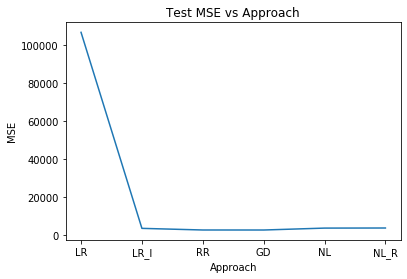

In [430]:
plt.ylabel('MSE')
plt.xlabel('Approach')
plt.title("Test MSE vs Approach")
plt.plot(["LR","LR_I","RR","GD","NL","NL_R"],bar_test)
plt.show()



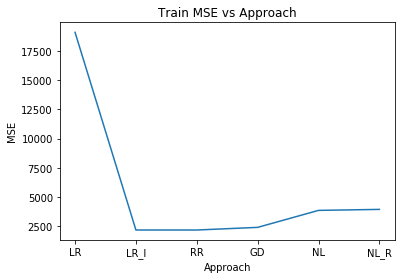

In [427]:
from matplotlib.backends.backend_pdf import PdfPages
plt.ylabel('MSE')
plt.xlabel('Approach')
plt.title("Train MSE vs Approach")
d = plt.plot(["LR","LR_I","RR","GD","NL","NL_R"],bar_train)
plt.savefig("1.pdf")

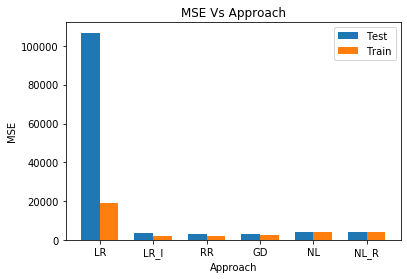

<Figure size 432x288 with 0 Axes>

In [432]:
bar_test
bar_train

ind = np.arange(len(bar_test)) 
width = 0.35       
plt.bar(ind, bar_test, width, label='Test')
plt.bar(ind + width, bar_train, width,
    label='Train')

plt.ylabel('MSE')
plt.xlabel('Approach')
plt.title('MSE Vs Approach')

plt.xticks(ind + width / 2, ("LR","LR_I","RR","GD","NL","NL_R"))
plt.legend(loc='best')
plt.show()
plt.savefig("bar_plot.pdf")

In [496]:
s = 1.0 / (1.0 + np.exp(-1.0 * (0.8385)))
s
z = 0.5*(0.5-s)**2
s

0.6981492046488429